In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d=pd.read_csv("/content/housing_price_prediction.csv.zip")
print(d)


       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]


In [ ]:
y=d["Price"]
print(y)
d.shape

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 50000, dtype: float64


(50000, 6)

In [ ]:
x=d.drop("Price",axis=1)
print(x)
d.shape

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt
0            2126         4          1        Rural       1969
1            2459         3          2        Rural       1980
2            1860         2          1       Suburb       1970
3            2294         2          1        Urban       1996
4            2130         5          2       Suburb       2001
...           ...       ...        ...          ...        ...
49995        1282         5          3        Rural       1975
49996        2854         2          2       Suburb       1988
49997        2979         5          3       Suburb       1962
49998        2596         5          2        Rural       1984
49999        1572         5          3        Rural       2011

[50000 rows x 5 columns]


(50000, 6)

Text(0.5, 1.0, 'Prices distribution')

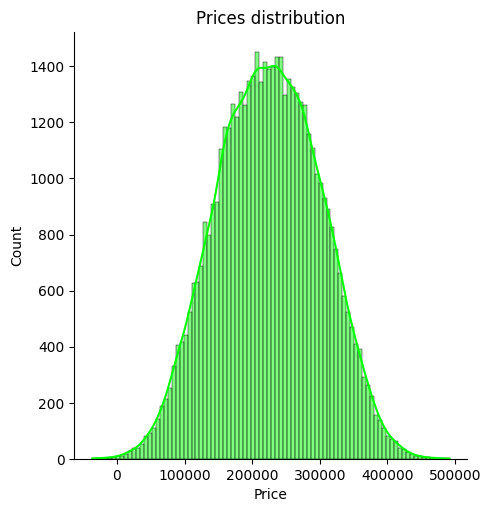

In [ ]:
import seaborn as sns
sns.displot(d.Price, kde = True, color='lime')
plt.title('Prices distribution')

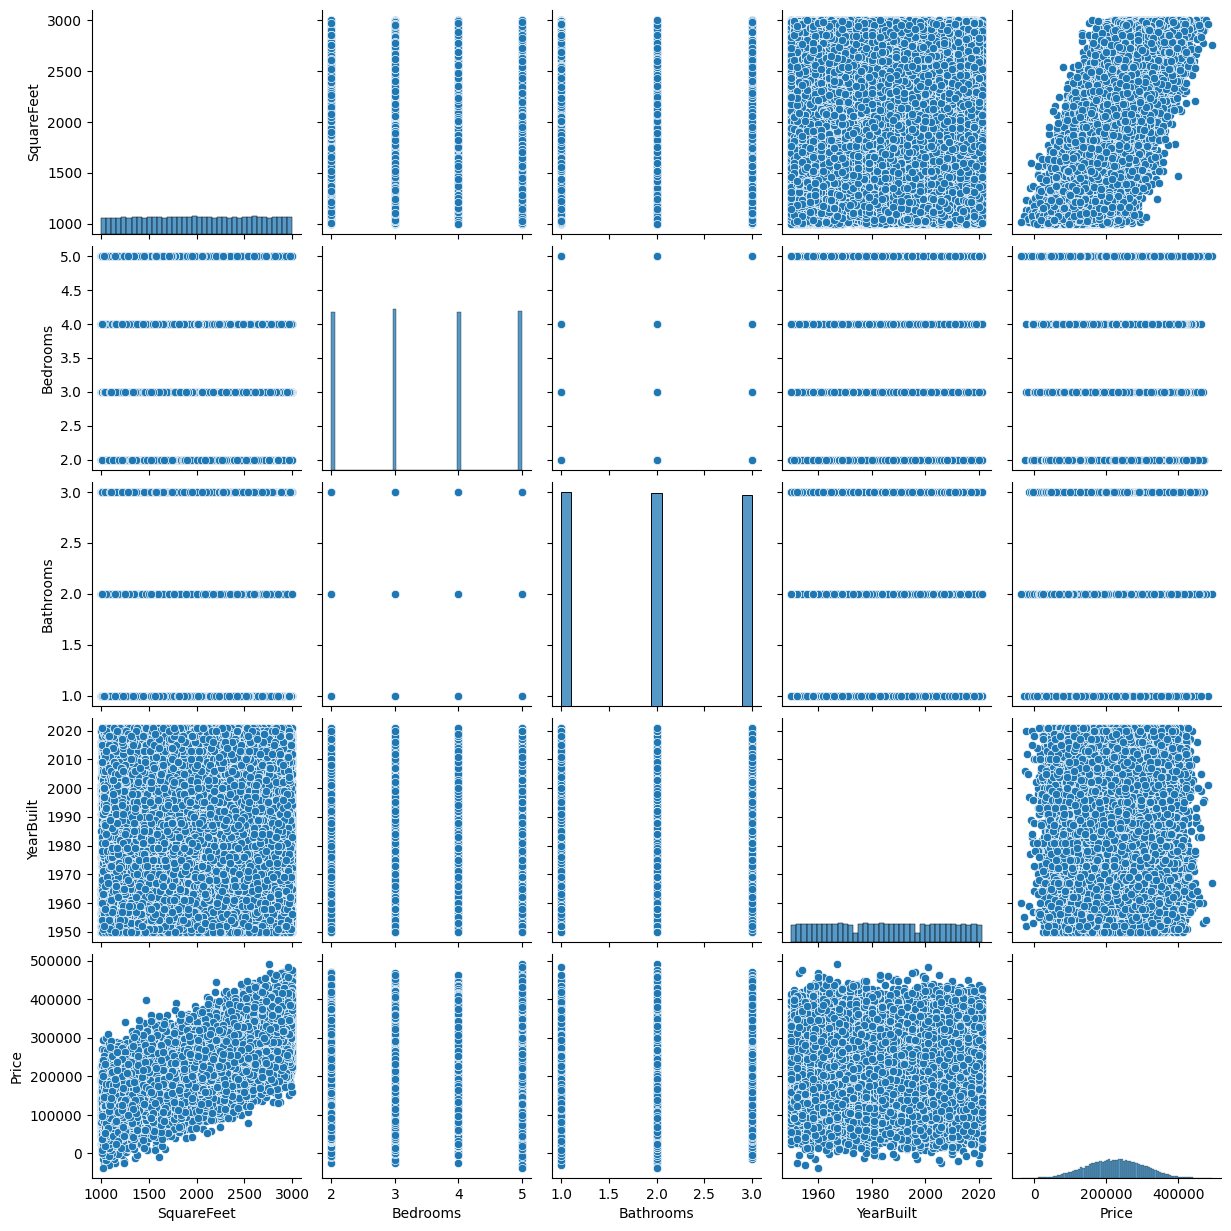

In [ ]:
sns.pairplot(d)

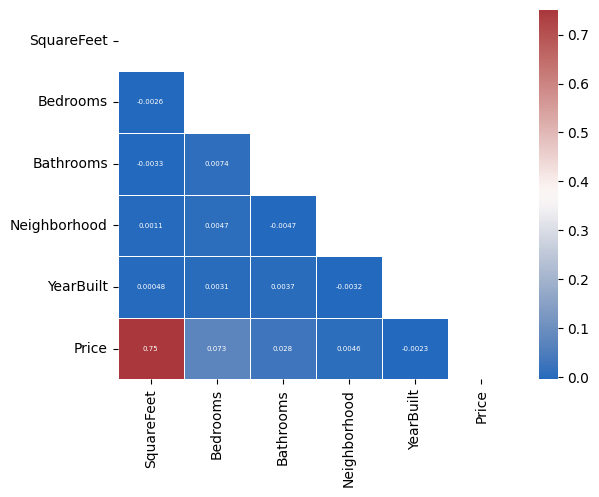

In [ ]:
matrix = np.triu(d.corr())
sns.heatmap(d.corr(), mask=matrix, cmap='vlag',
            linewidths=0.5, linecolor='white',annot=True, annot_kws={'size':5})
plt.show()

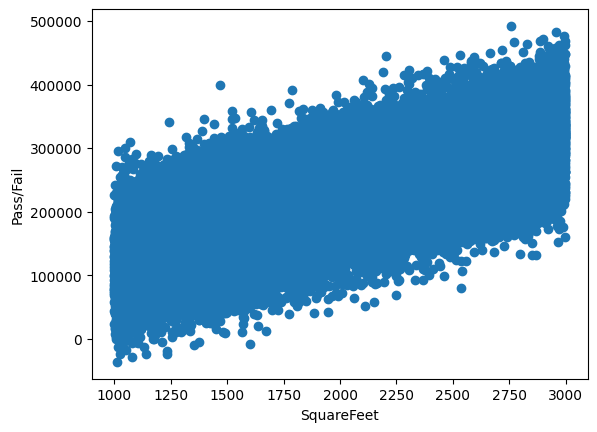

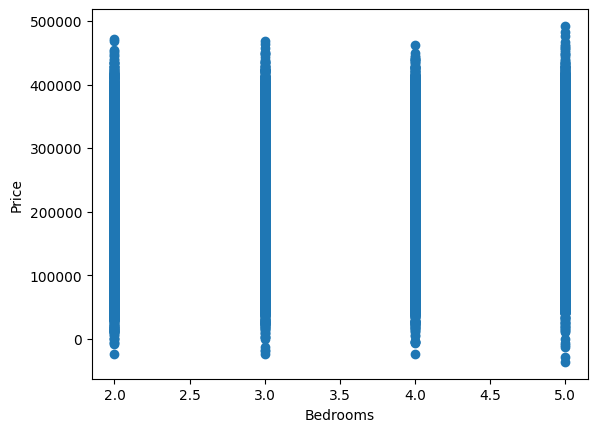

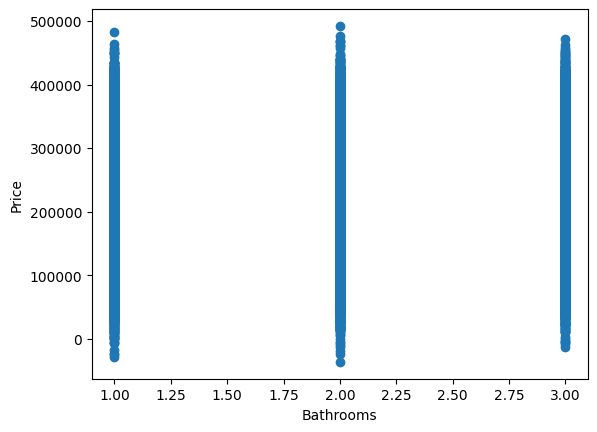

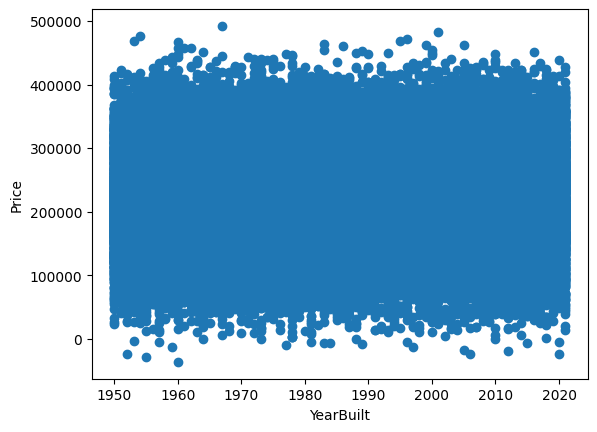

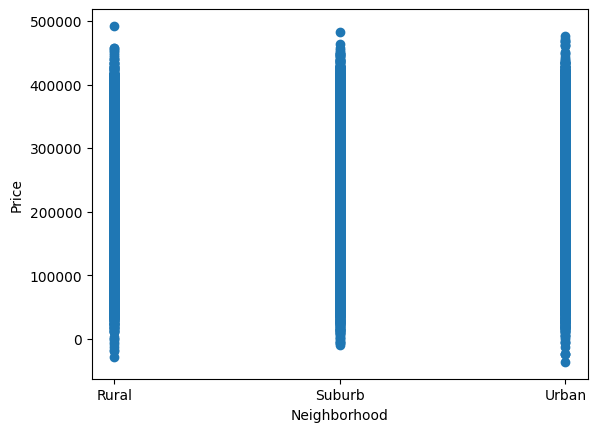

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(d['SquareFeet'],d['Price'])
plt.xlabel("SquareFeet")
plt.ylabel("Pass/Fail")
plt.show()


plt.scatter(d['Bedrooms'],d['Price'])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


plt.scatter(d['Bathrooms'],d['Price'])
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()




plt.scatter(d['YearBuilt'],d['Price'])
plt.xlabel("YearBuilt")
plt.ylabel("Price")
plt.show()


plt.scatter(d['Neighborhood'],d['Price'])
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.show()



In [ ]:
d['Neighborhood']=d['Neighborhood'].replace({'Rural':1,'Suburb':0,'Urban':0.5})
print(d)



       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0            2126         4          1           1.0       1969  215355.283618
1            2459         3          2           1.0       1980  195014.221626
2            1860         2          1           0.0       1970  306891.012076
3            2294         2          1           0.5       1996  206786.787153
4            2130         5          2           0.0       2001  272436.239065
...           ...       ...        ...           ...        ...            ...
49995        1282         5          3           1.0       1975  100080.865895
49996        2854         2          2           0.0       1988  374507.656727
49997        2979         5          3           0.0       1962  384110.555590
49998        2596         5          2           1.0       1984  380512.685957
49999        1572         5          3           1.0       2011  221618.583218

[50000 rows x 6 columns]


<ipython-input-9-c8297f529ff9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['Neighborhood']=d['Neighborhood'].replace({'Rural':1,'Suburb':0,'Urban':0.5})


In [ ]:
for column in x.select_dtypes(include=['object']).columns:
    try:
        x[column] = pd.to_numeric(x[column])
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric. It may contain non-numeric values.")
for column in x.select_dtypes(include=['object']).columns:
    try:
        x[column] = pd.to_numeric(x[column], errors='coerce')
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric. It may contain non-numeric values.")

x = x.fillna(0)

dd = (x - x.min()) / (x.max() - x.min())

print(dd)

Column 'Neighborhood' could not be converted to numeric. It may contain non-numeric values.
       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt
0        0.563282  0.666667        0.0           NaN   0.267606
1        0.729865  0.333333        0.5           NaN   0.422535
2        0.430215  0.000000        0.0           NaN   0.281690
3        0.647324  0.000000        0.0           NaN   0.647887
4        0.565283  1.000000        0.5           NaN   0.718310
...           ...       ...        ...           ...        ...
49995    0.141071  1.000000        1.0           NaN   0.352113
49996    0.927464  0.000000        0.5           NaN   0.535211
49997    0.989995  1.000000        1.0           NaN   0.169014
49998    0.798399  1.000000        0.5           NaN   0.478873
49999    0.286143  1.000000        1.0           NaN   0.859155

[50000 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(d, test_size = 0.2)

In [ ]:
x_train = train.iloc[:, :20].values
x_test = test.iloc[:, :20].values

In [ ]:
y_train = train['Price'].values
y_test = test['Price'].values

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
 from sklearn.linear_model import LinearRegression
 model_lr = LinearRegression()
 model_lr.fit(x_train, y_train)
 y_train_predict = model_lr.predict(x_train)
 y_test_predict = model_lr.predict(x_test)
 print(f'train data MSE score: {mean_squared_error(y_train, y_train_predict)}')
 print(f'train data MAE score: {mean_absolute_error(y_train, y_train_predict)}')
 print(f'train data RMSE score: {root_mean_squared_error(y_train, y_train_predict)}')
 print()
 print(f'test data MSE score: {mean_squared_error(y_test, y_test_predict)}')
 print(f'test data MAE score: {mean_absolute_error(y_test, y_test_predict)}')
 print(f'test data RMSE score: {root_mean_squared_error(y_test, y_test_predict)}')

train data MSE score: 7.77947166613931e-22
train data MAE score: 1.801032283310633e-11
train data RMSE score: 2.789170426155295e-11

test data MSE score: 7.702347801517309e-22
test data MAE score: 1.7745088598530855e-11
test data RMSE score: 2.7753103973280735e-11


In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)
y_pred_train = model_svr.predict(x_train)
y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()


train data MSE score SVR: 5068616973.360942
train data MAE score SVR: 57815.79674734441
train data RMSE score SVR: 71194.2200839432

test data MSE score SVR: 5029616217.2906
test data MAE score SVR: 57587.71596703397
test data RMSE score SVR: 70919.78720562125



In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)


y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

y_pred_lasso1 = model_lasso.predict(x_train)
y_pred_ridge1 = model_ridge.predict(x_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')
print()






test data MSE score lasso: 0.0018623379712217965
test data MAE score lasso: 0.03475133885702335
test data RMSE score lasso: 0.04315481399822964

train data MSE score lasso: 0.0018788825155587937
train data MAE score lasso: 0.035015420648064254
train data RMSE score lasso: 0.04334607843344994



In [ ]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [ ]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 3.238654012611472e-19
train data MAE score ridge: 4.5504229149173625e-10
train data RMSE score ridge: 5.690917336081655e-10

test data MSE score ridge: 3.190931282436993e-19
test data MAE score ridge: 4.4971135082505497e-10
test data RMSE score ridge: 5.648832872759641e-10



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

y_pred_knn = model_knn.predict(x_test)
y_pred_knn1 = model_knn.predict(x_train)

mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
rmse = root_mean_squared_error(y_test, y_pred_knn)

mse1=mean_squared_error(y_train, y_pred_knn1)
mae1=mean_absolute_error(y_train, y_pred_knn1)
rmse1=root_mean_squared_error(y_train, y_pred_knn1)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print()
print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")
print(f"Root Mean Squared Error: {rmse1}")


Mean Squared Error: 41164.45267000136
Mean Absolute Error: 30.475716599591674
Root Mean Squared Error: 202.8902478435111

Mean Squared Error: 8661.072633552641
Mean Absolute Error: 23.593373819751296
Root Mean Squared Error: 93.06488399795404
